In [1]:
from aeon.datasets import load_classification

X_train, y_train = load_classification("GunPoint", split="train")
X_test, y_test = load_classification("GunPoint", split="test")

print(f"shape of the array: {X_train.shape}")
print(f"n_samples = {X_train.shape[0]}")
print(f"n_channels = {X_train.shape[1]}")
print(f"n_timepoints = {X_train.shape[2]}")

shape of the array: (50, 1, 150)
n_samples = 50
n_channels = 1
n_timepoints = 150


In [2]:
from sklearn.ensemble import RandomForestClassifier

from aeon.classification.shapelet_based import SASTClassifier

stc = SASTClassifier(classifier=RandomForestClassifier(ccp_alpha=0.01)).fit(
    X_train, y_train
)

C:\Users\vanya\OneDrive - University of Southampton\Documents\Vanya's Directory\aeon\aeon\base\__init__.py:24: FutureWarning: The aeon package will soon be releasing v1.0.0 with the removal of legacy modules and interfaces such as BaseTransformer and BaseForecaster. This will contain breaking changes. See aeon-toolkit.org for more information. Set aeon.AEON_DEPRECATION_WARNING or the AEON_DEPRECATION_WARNING environmental variable to 'False' to disable this warning.
  warnings.warn(


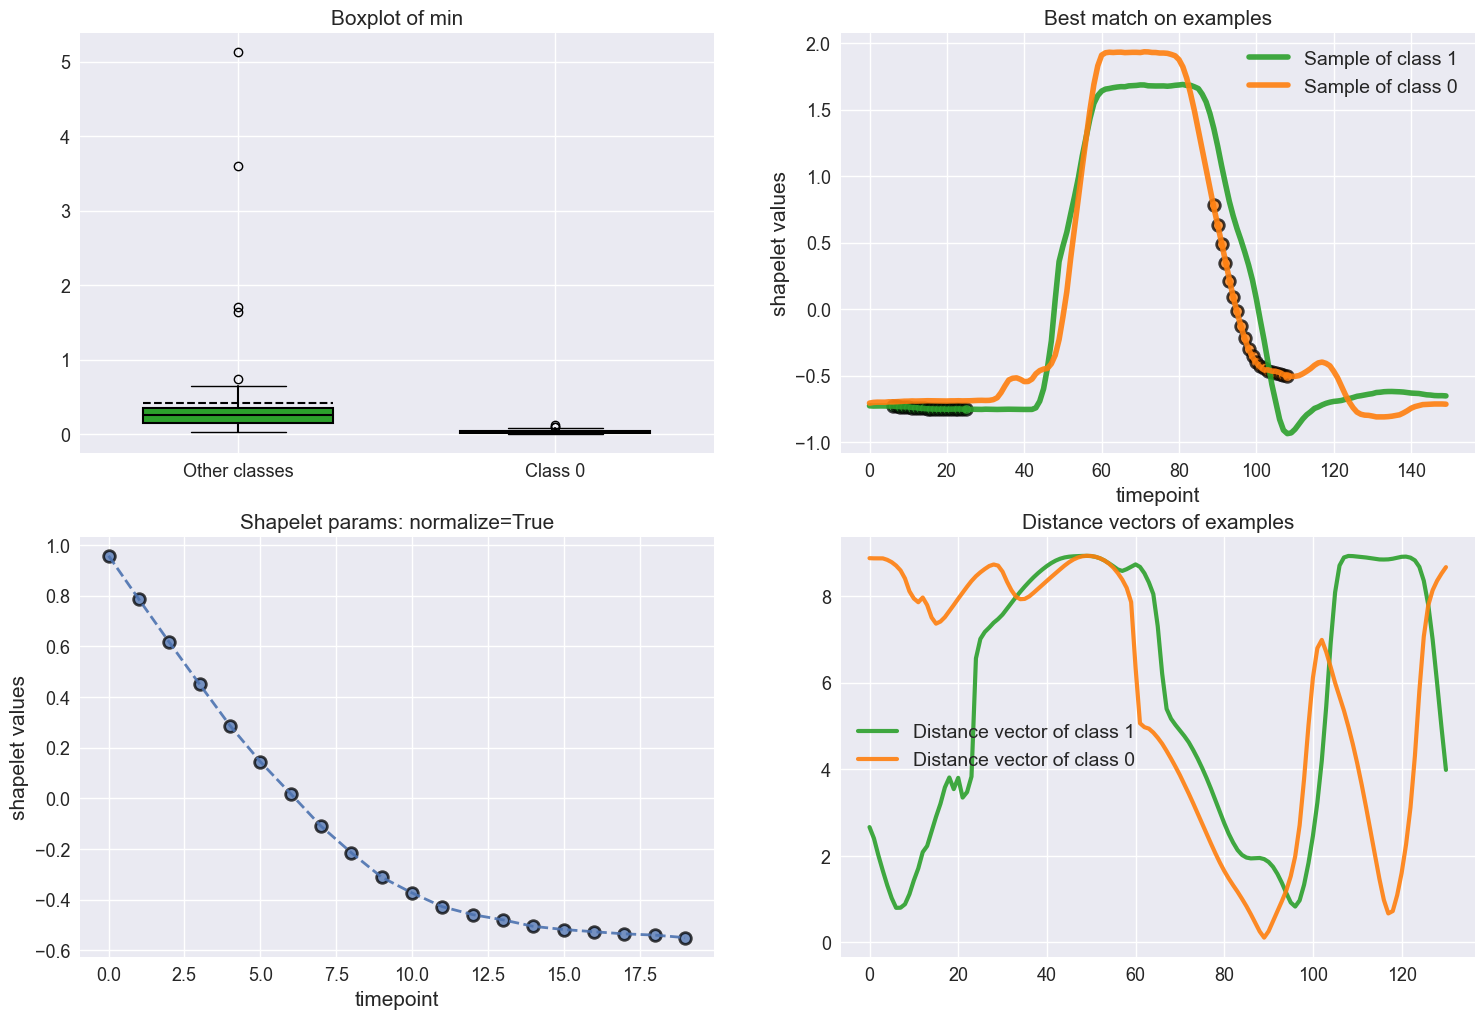

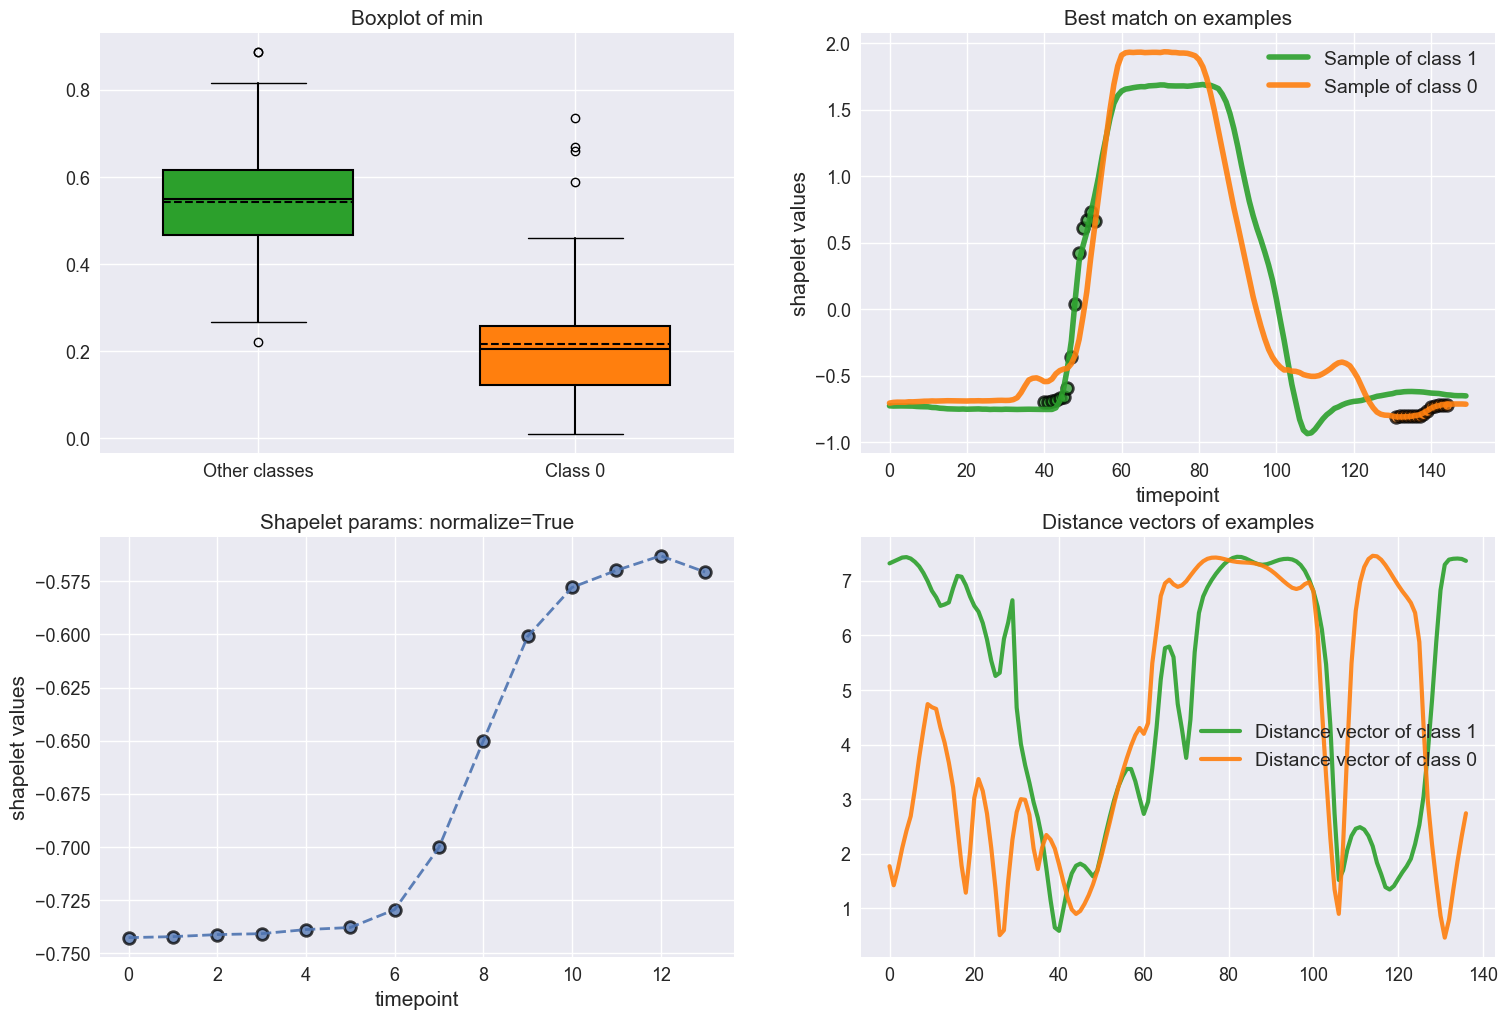

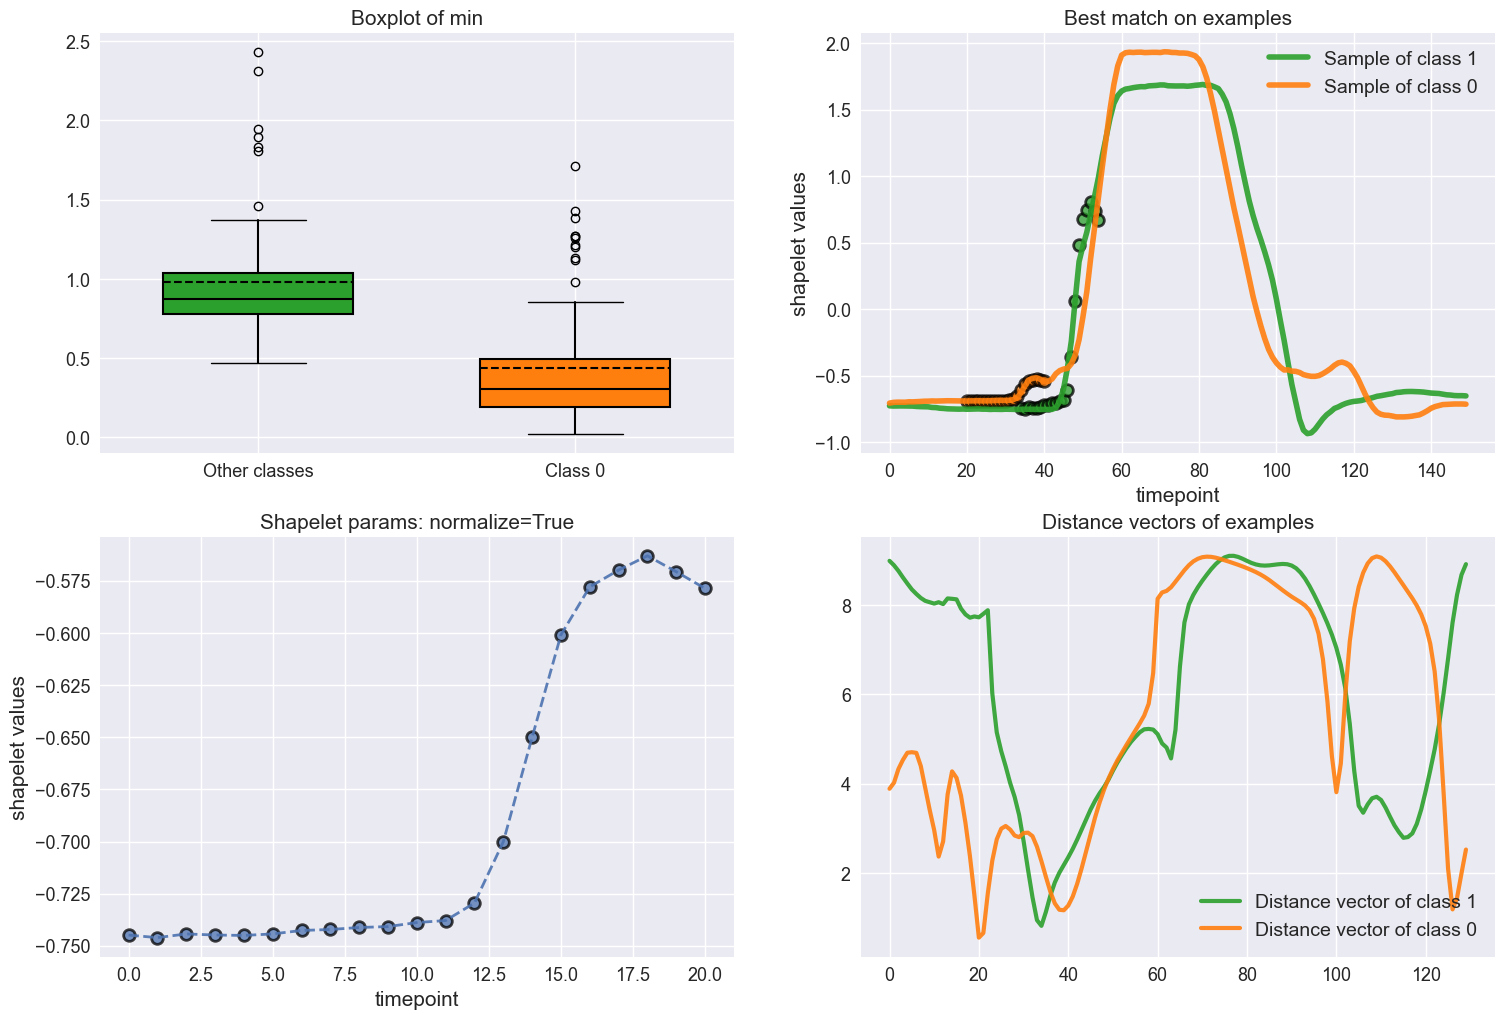

In [3]:
from aeon.visualisation import ShapeletClassifierVisualizer

stc_vis = ShapeletClassifierVisualizer(stc)
id_class = 0
fig = stc_vis.visualize_shapelets_one_class(
    X_test,
    y_test,
    id_class,
    n_shp=3,
    figure_options={"figsize": (18, 12), "nrows": 2, "ncols": 2},
)

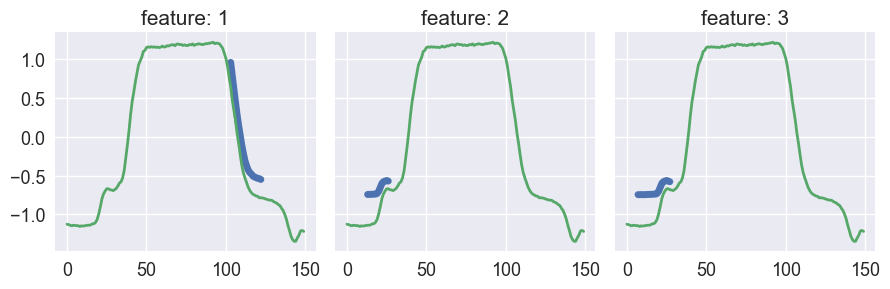

In [4]:
weights = stc._classifier.feature_importances_
fig = stc.plot_most_important_feature_on_ts(X_test[0][0], weights, 3)

As you can see the same 3  shapelets are plotted ontop of the first object in the test set. These both show the same information only in a very slightly different format. The second might be useful if trying to make plots the same as the original paper however this can be achieved through the shapelet viz module by using the plot_on_x function.

- Differences are
    - SAST plot doesn't normalise distances
    - SAST plots the best shapelets irrespective of class while shapeletViz plots them specific to a class, this would become apparent in linear classifier pipelines
Overall I think we can remove the SAST function, since it isn't providing adiditional insight that isn't present in shapeletViz